In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_ind = df[df['job_country'] == 'India'].dropna(subset='salary_year_avg')
df_ind[df['job_title_short'] == 'Senior Data Engineer']['salary_year_avg'].agg('median')

C:\Temp_test\ipykernel_22428\2048441643.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ind[df['job_title_short'] == 'Senior Data Engineer']['salary_year_avg'].agg('median')


147500.0

In [16]:
job_title = df_ind['job_title_short'].value_counts().index[:6].to_list()
job_title

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [17]:
df_ind_top6  = df_ind[df_ind['job_title_short'].isin(job_title)]
df_ind_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781857,Senior Data Engineer,Senior Data Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-03-26 06:17:50,False,False,India,year,147500.0,NaN,Publicis Groupe,"[sas, sas, sql, python, oracle]","{'analyst_tools': ['sas'], 'cloud': ['oracle']..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [18]:
job_order = df_ind_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

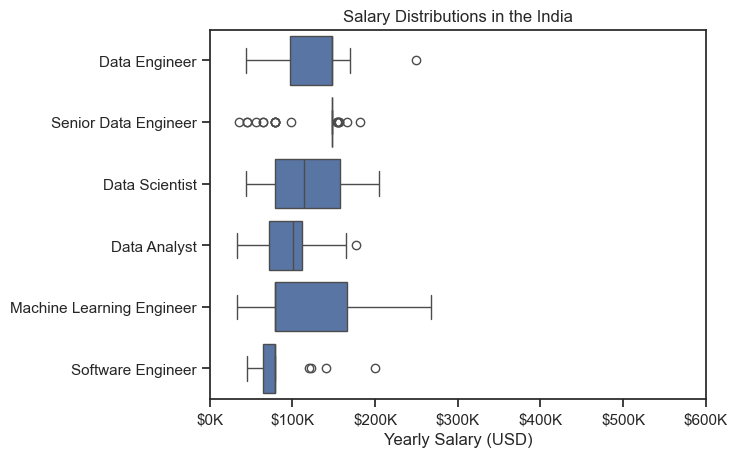

In [19]:
sns.boxplot(data=df_ind_top6, x='salary_year_avg', y='job_title_short', order= job_order)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Interpretation: Senior Data Engineer

Highly Consistent Salaries:

The absence of a visible box suggests that the majority of "Senior Data Engineer" salaries are highly consistent, with minimal variation. This uniformity is likely because of standardized salary structures or similar levels of experience and responsibilities among those jobs which where posted in the year 2023.

Presence of Outliers:
Despite the consistency, the presence of outliers indicates that there are exceptions. Some Senior Data Engineers earn significantly more, likely due to factors like specialized skills, additional responsibilities, or employment in high-paying sectors.
Comparison with Other Roles:

Compared to other roles, "Senior Data Engineer" salaries appear less variable within the core range but have notable outliers. Other roles show a visible IQR, indicating broader variability in salaries.


Interpretation :Data Engineers 

Data Engineers generally have a high median salary and a broad IQR, indicating variability in earnings. The presence of a high outlier suggests opportunities for significantly higher earnings, likely due to specialized skills, significant experience, or senior roles.

Interpretation :Data Scientist

Data Scientists have a moderate to high salary range with a noticeable variability. The presence of outliers indicates opportunities for higher earnings, while the main salary range is more consistent compared to other roles like Data Engineer.


Interpretation :Data Analyst
Data Analysts generally have a lower salary range compared to Data Scientists and Data Engineers. The presence of outliers suggests occasional higher earnings, while the main salary distribution is more narrow and consistent.

Interpretation :Machine Learning Engineers 
Machine Learning Engineers have a high salary range with broad variability. The presence of outliers indicates the potential for very high earnings in certain situations. The main salary range (IQR) is broad, suggesting diverse earning potential within the role.

Interpretation:Software Engineers

Software Engineers have the lowest median salary among the roles listed. The IQR and whiskers indicate a narrower spread of salaries, with some potential for higher earnings as shown by the outliers. The overall salary range is more consistent and lower compared to roles like Data Engineer or Machine Learning Engineer.


# Determine The Highest Paid Skills and Most Demanded Skills

In [29]:
# Only get data analyst jobs in the US
df_DA_ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_ind = df_DA_ind.dropna(subset=['salary_year_avg'])

df_DA_ind = df_DA_ind.explode('job_skills')

# df_DA_ind[['salary_year_avg', 'job_skills']].head(5)


df_DA_top_pay = df_DA_ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [27]:
df_DA_top_skills = df_DA_ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_top_skills = df_DA_top_skills.head(10).sort_values(by='median', ascending=False)
df_DA_top_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


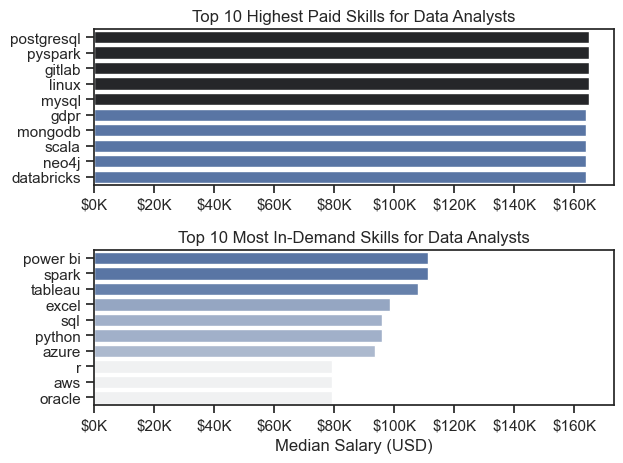

In [30]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()